<a href="https://colab.research.google.com/github/NachoBosch/DataScience/blob/main/Modelos_de_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Clasificación con SciKit-Learn 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

+ ## Descripción y Exploración del Dataset:

El dataset cuenta con las siguientes variables:
- ``age``: Edad.
- ``male``: Género.
- ``education``: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- ``currentSmoker``: Si la persona fuma o no
- ``cigsPerDay``: la cantidad de cigarrillos que la persona fuma por día en promedio.
- ``BPMeds``: si la persona consume medicación para la presión sanguínea.
- ``prevalentStroke``: Si la persona tuvo un infarto anteriormente.
- ``prevalentHyp``: si la persona tiene hipertensión.
- ``diabetes``: si la persona tuvo diabetes.
- ``totChol``: nivel de colesterol total.
- ``sysBP``: presión sanguínea sistólica.
- ``diaBP``: presión sanguínea diastólica.
- ``BMI``: índice de masa corporal.
- ``heartRate``: frecuencia cardíaca.
- ``glucose``: nivel de glucosa en sangre.
- ``TenYearCHD``: si la persona está en riesgo de tener una enfermedad coronaria dentro de los próximos 10 años.

Para obtener más información sobre las variables, buscar en https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
# Importamos el dataset y hacemos un head()
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Observamos la cantidad de nulos por feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# Calculamos el % de registros totales que contienen al menos un valor nulo
print('% de registros con al menos un valor nulo:     ', np.round(100 * df.isna().any(axis=1).sum() / df.shape[0], 1))

% de registros con al menos un valor nulo:      13.7


In [ ]:
# Aplicamos un describe() para ver estadísticos básicos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [ ]:
# Calculamos las proporciones de cada clase en la variable Target
df['TenYearCHD'].value_counts(True)
# Se puede apreciar que estan claramente desbalanceadas

0    0.848113
1    0.151887
Name: TenYearCHD, dtype: float64

In [ ]:
# Aplicamos describe() previa aplicacion del metodo astype, con el objeto de tratar a las variables como objetos (strings)
df.astype(object).describe().T
# De esta manera podemos ver si dentro de las variables numericas hay algunas que sean mas bien discretas (y no continuas)

,count,unique,top,freq
male,4240.0,2.0,0.00,2420.0
age,4240.0,39.0,40.00,192.0
education,4135.0,4.0,1.00,1720.0
currentSmoker,4240.0,2.0,0.00,2145.0
cigsPerDay,4211.0,33.0,0.00,2145.0
BPMeds,4187.0,2.0,0.00,4063.0
prevalentStroke,4240.0,2.0,0.00,4215.0
prevalentHyp,4240.0,2.0,0.00,2923.0
diabetes,4240.0,2.0,0.00,4131.0
totChol,4190.0,248.0,240.00,85.0


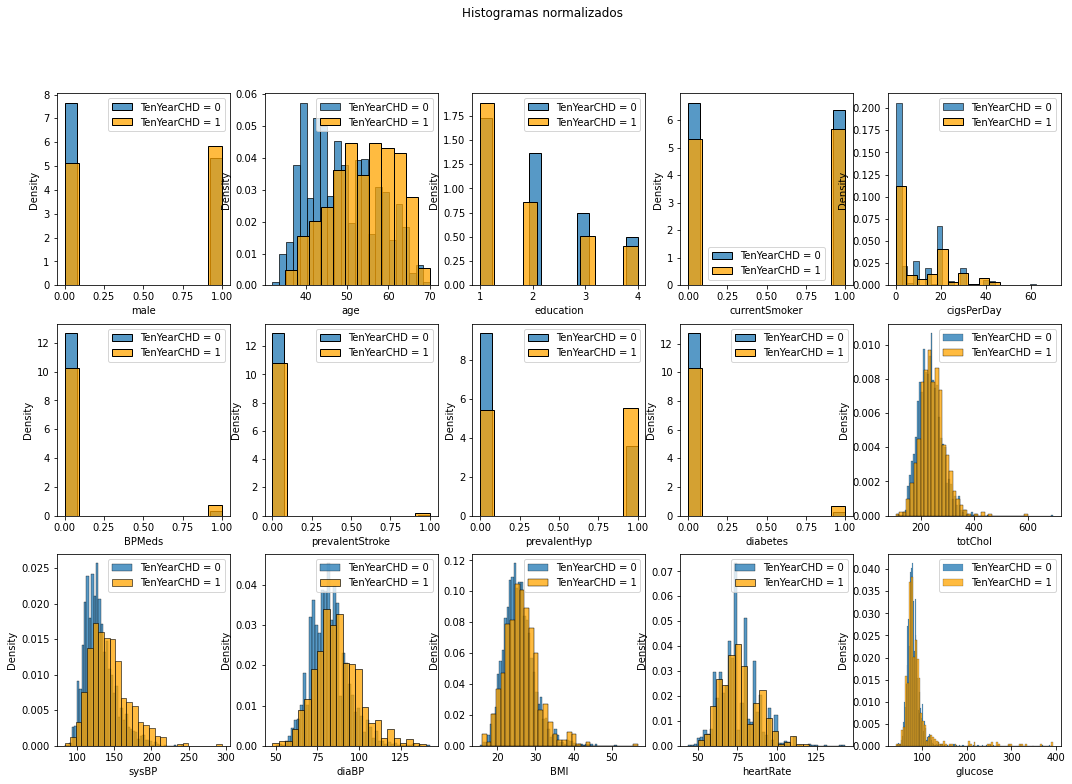

In [ ]:
# Creamos un grafico para cada feature discriminando por el valor del target con un loop
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df.columns[:-1], axes.flatten()):
    sns.histplot(data = df.loc[df['TenYearCHD']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['TenYearCHD']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])
# Importante: el grafico utiliza el metodo "density" que permite comparar las clases desbalanceadas (ver que ocurre con otro metodos)

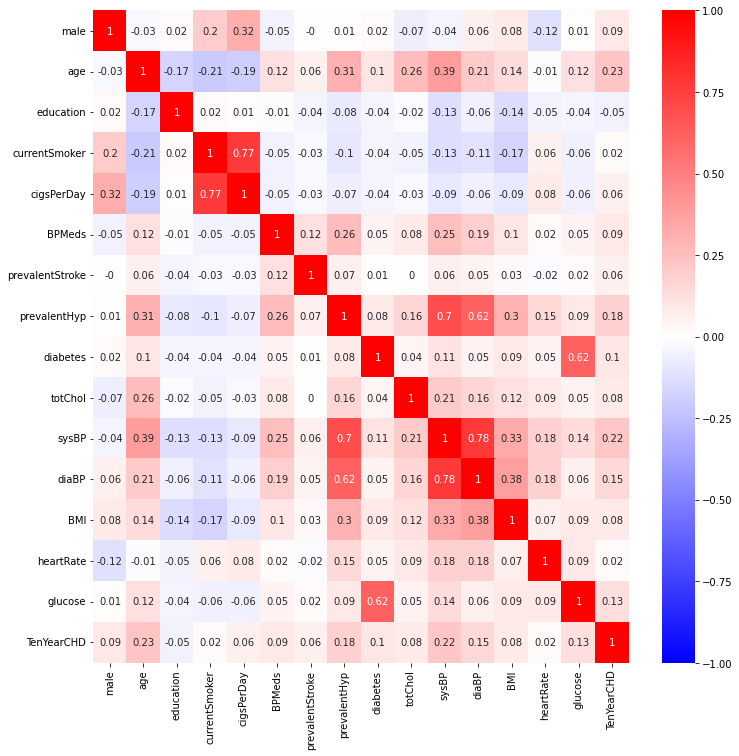

In [ ]:
# Graficamos en un mapa de calor los coeficientes de correlacion de todas las variables entre sí
plt.figure(figsize=(12,12))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='bwr')

In [ ]:
# Eliminamos los registros con valores faltantes ya que son sólo un 13% del dataset
df.dropna(inplace=True)

# Preparamos la matriz de features y el vector objetivo
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Separamos un set de testeo para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

# Estandarizamos los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 1. Modelo de Regresión Logística

In [ ]:
#Instanciamos el modelo de Regresion logistica y lo entrenamos. Almacenamos las predicciones
lr = LogisticRegression(penalty='l2', 
                        class_weight='balanced'
                       )
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)

Accuracy del modelo de Reg. Logistica :    0.671
Accuracy del modelo de Reg. Logistica :    0.67
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.92      0.67      0.78      2325
           1       0.27      0.67      0.38       418

    accuracy                           0.67      2743
   macro avg       0.59      0.67      0.58      2743
weighted avg       0.82      0.67      0.72      2743



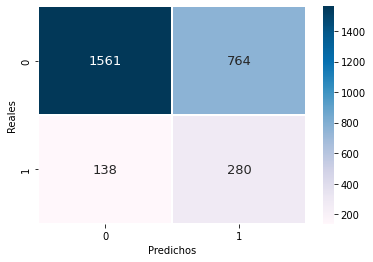

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion

model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_train_pred).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', recall_score(y_train, y_train_pred).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred))

+ ### Visualización de como predice el modelo según la probabilidad y los efectos sobre las métricas

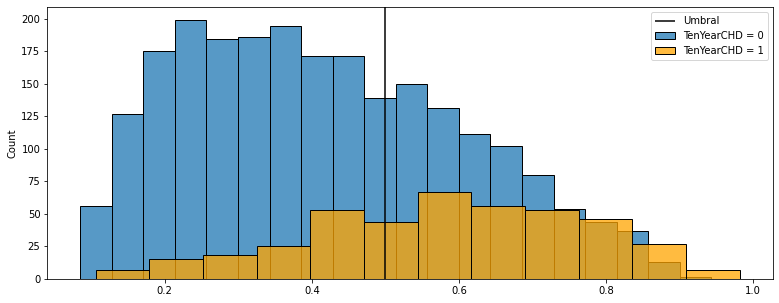

In [ ]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = lr.predict_proba(X_train_std[y_train==0])[:,1], stat = 'count', ax=ax01)
sns.histplot(data = lr.predict_proba(X_train_std[y_train==1])[:,1], stat = 'count', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

+ ### Cambio en las métricas en función del umbral elegido

In [ ]:
# Realizamos predicciones con un umbral distinto al que se establece por defecto (0.5)
umbral = 0.4
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train_umbral = probs > umbral

Accuracy del modelo de Reg. Logistica :    0.556
Accuracy del modelo de Reg. Logistica :    0.835
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.94      0.51      0.66      2325
           1       0.23      0.83      0.36       418

    accuracy                           0.56      2743
   macro avg       0.59      0.67      0.51      2743
weighted avg       0.84      0.56      0.61      2743



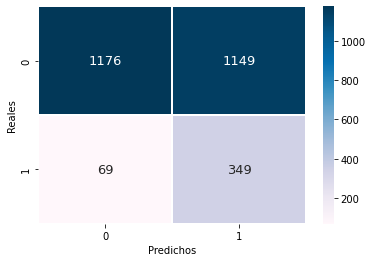

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion
model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_pred_train_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_pred_train_umbral).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', recall_score(y_train, y_pred_train_umbral).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_pred_train_umbral))

+ ### ¿Cómo se comporta el modelo en testeo?

In [ ]:
# Y ahora hacemos predicciones en testeo con el umbral elegido
probs = lr.predict_proba(X_test_std)[:,1]
y_pred_test_umbral = probs > umbral

Accuracy del modelo de Reg. Logistica :    0.57
Accuracy del modelo de Reg. Logistica :    0.813
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.94      0.53      0.68       776
           1       0.24      0.81      0.37       139

    accuracy                           0.57       915
   macro avg       0.59      0.67      0.52       915
weighted avg       0.83      0.57      0.63       915



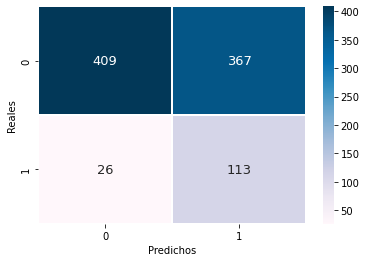

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion
model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_test, y_pred_test_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_test, y_pred_test_umbral).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', recall_score(y_test, y_pred_test_umbral).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_test, y_pred_test_umbral))

## 2. Modelo de Naive Bayes

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_train_pred_gnb = gnb.predict(X_train)

Accuracy del modelo de Naibe Bayes:     0.82
Recall del modelo de Naibe Bayes:       0.213


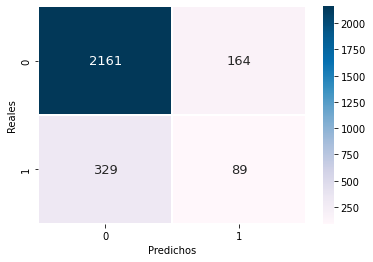

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_gnb), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
          annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de Naibe Bayes:    ', accuracy_score(y_train, y_train_pred_gnb).round(3))
print('Recall del modelo de Naibe Bayes:      ', recall_score(y_train, y_train_pred_gnb).round(3))

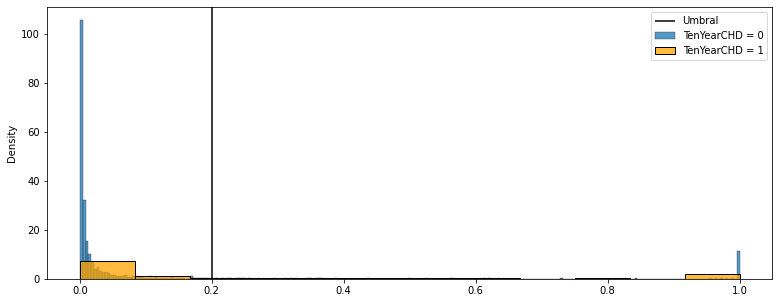

In [ ]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = gnb.predict_proba(X_train[y_train==0])[:,1], stat = 'density', ax=ax01)
sns.histplot(data = gnb.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.2, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

+ ### Comportamiento en entrenamiento

In [ ]:
umbral = 0.1
probs = gnb.predict_proba(X_train)[:,1]
y_pred_train_gnb_umbral = probs > umbral

Accuracy del modelo de NaiveBayes:     0.782
Recall del modelo de NaiveBayes:     0.38


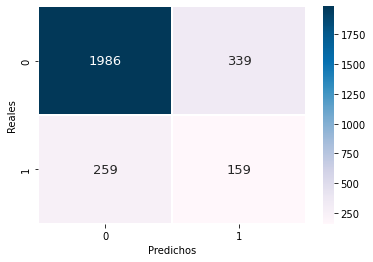

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train_gnb_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de NaiveBayes:    ', accuracy_score(y_train, y_pred_train_gnb_umbral).round(3))
print('Recall del modelo de NaiveBayes:    ', recall_score(y_train, y_pred_train_gnb_umbral).round(3))

+ ### Comportamiento en testeo

In [ ]:
probs = gnb.predict_proba(X_test)[:,1]
y_pred_test_gnb_umbral = probs > umbral

Accuracy del modelo de NaiveBayes (Testeo):     0.8
Recall del modelo de Naive Bayes (Testeo):      0.374


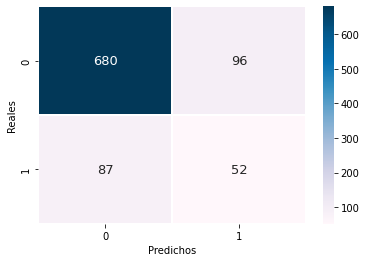

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_gnb_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de NaiveBayes (Testeo):    ', accuracy_score(y_test, y_pred_test_gnb_umbral).round(3))
print('Recall del modelo de Naive Bayes (Testeo):     ', recall_score(y_test, y_pred_test_gnb_umbral).round(3))

## 3. Modelo de AdaBoost

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 2, 
                             min_samples_split = 6)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 650,
                         learning_rate = 0.7)

In [ ]:
ada.fit(X_train, y_train)

y_train_pred_ada = ada.predict(X_train)

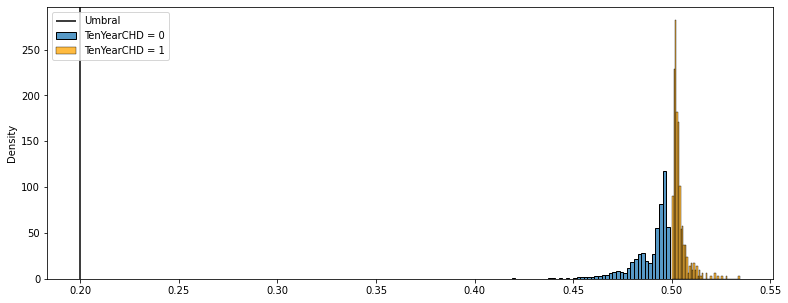

In [ ]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = ada.predict_proba(X_train[y_train==0])[:,1], stat = 'density', ax=ax01)
sns.histplot(data = ada.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.2, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

+ ### Comportamiento en entrenamiento

In [ ]:
umbral = 0.5
probs = ada.predict_proba(X_train)[:,1]
y_pred_train_ada_umbral = probs > umbral

Accuracy del modelo de AdaBoost:     1.0
Recall del modelo de AdaBoost:     1.0


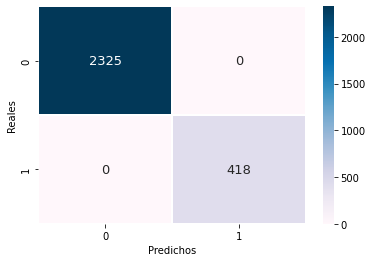

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost:    ', accuracy_score(y_train, y_pred_train_ada_umbral).round(3))
print('Recall del modelo de AdaBoost:    ', recall_score(y_train, y_pred_train_ada_umbral).round(3))

+ ### Comportamiento en testeo

In [ ]:
probs = ada.predict_proba(X_test)[:,1]
y_pred_test_ada_umbral = probs > umbral

Accuracy del modelo de AdaBoost (Testeo):     0.803
Recall del modelo de AdaBoost (Testeo):     0.137


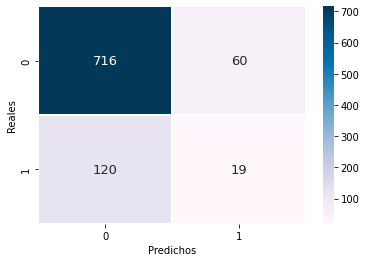

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost (Testeo):    ', accuracy_score(y_test, y_pred_test_ada_umbral).round(3))
print('Recall del modelo de AdaBoost (Testeo):    ', recall_score(y_test, y_pred_test_ada_umbral).round(3))

## 4.Optimización de hiperparámetros

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 2, 
                             min_samples_split = 6)

#lrc = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='saga', tol=0.001, max_iter=1500)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 650,
                         learning_rate = 0.7)

In [ ]:
param_grid = {'base_estimator__max_depth': [2, 3, 5],
              'base_estimator__min_samples_split': [6, 24, 96],
              'base_estimator__max_features': [None, 10, 6],
              'base_estimator__class_weight': [None, 'balanced'],
              'base_estimator__splitter': ["best", "random"],
              'n_estimators': [10, 30, 100],
              'learning_rate': [0.3, 0.5, 0.7]
             }

In [ ]:
#scorer = make_scorer(fbeta_score, beta=4)

grid_obj = GridSearchCV(ada, param_grid, scoring = 'recall', n_jobs=3, verbose=1, cv=3)

In [ ]:
grid_fit = grid_obj.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


In [ ]:
best_ada = grid_fit.best_estimator_
print(grid_fit.best_params_)
print(grid_fit.best_score_)
y_train_pred_ada_opt = best_ada.predict(X_train)
y_test_pred_ada_opt = best_ada.predict(X_test)

{'base_estimator__class_weight': 'balanced', 'base_estimator__max_depth': 2, 'base_estimator__max_features': None, 'base_estimator__min_samples_split': 6, 'base_estimator__splitter': 'random', 'learning_rate': 0.3, 'n_estimators': 10}
0.6985097636176772


Accuracy del modelo de AdaBoost optimizado:     0.654
Recall del modelo de AdaBoost optimizado:     0.682


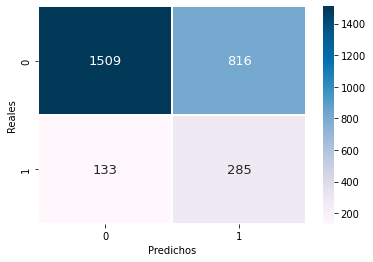

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_ada_opt), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost optimizado:    ', accuracy_score(y_train, y_train_pred_ada_opt).round(3))
print('Recall del modelo de AdaBoost optimizado:    ', recall_score(y_train, y_train_pred_ada_opt).round(3))

Accuracy del modelo de AdaBoost optimizado (Testeo):     0.677
Recall del modelo de AdaBoost optimizado (Testeo):       0.698


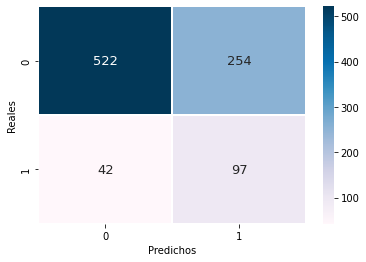

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_ada_opt), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost optimizado (Testeo):    ', accuracy_score(y_test, y_test_pred_ada_opt).round(3))
print('Recall del modelo de AdaBoost optimizado (Testeo):      ', recall_score(y_test, y_test_pred_ada_opt).round(3))